In [9]:
cd "/home/enesk/repos/spatial-prediction"

/home/enesk/repos/spatial-prediction


In [10]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
import pandas as pd
import numpy as np
import os
from geometry import get_building_grid
import matplotlib.pyplot as plt
#import seaborn as sns
from os import listdir
from os.path import isfile, join, isdir
from utils import store_configuration
import random
from process_ray_trac_dat_new import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [11]:
print(os.environ['LD_LIBRARY_PATH'])

/home/enesk/miniconda3/envs/triad4/lib/:/home/enesk/miniconda3/envs/triad4/lib/python3.9/site-packages/tensorrt_libs/


In [12]:
# The column numbers for the data coming from Wireless Insite
X_COORD_COL = 1
Y_COORD_COL = 2
Z_COORD_COL = 3
POWER_COL = 5
DATA_STARTS = 4 # The row in which data starts in the wireless insite outputs


SCENARIOS_DIR = '/media/enesk/optical_hdd/Enes/spatial_prediction/wi_setups_4d/'
POWER_OF_AN_INACCESSIBLE_FIELD = -250

In [13]:
# Count the number of completed simulations
all_folders = [f for f in listdir(SCENARIOS_DIR) if isdir(join(SCENARIOS_DIR, f))]

number_of_scenarios = len(set([f.split('-')[0] for f in listdir(SCENARIOS_DIR) if isdir(join(SCENARIOS_DIR, f))]))

print('Number of scenarios:', number_of_scenarios)

#all_comm_files = [f for f in listdir(COMM_DATA_DIR) if isfile(join(COMM_DATA_DIR, f))] 
all_folders.sort()
building_grid = []

count = 0
processed_scens = []
processed_scens_per_city = {}

for folder in all_folders:
    scenario = int(folder.split('-')[0])
    transmitter = int(folder.split('-')[1])

    print('Scenario: %d, Transmitter: %d' % (scenario, transmitter))

    comm_file_path = SCENARIOS_DIR + folder + '/Study Area/setup.power.t001_01.r003.p2m'

    if isfile(comm_file_path):
        count += 1
        processed_scens.append(scenario)
        if scenario in processed_scens_per_city:
            processed_scens_per_city[scenario].append(transmitter)
        else:
            processed_scens_per_city[scenario] = []
        # Delete the paths file and sqlite file since we do not use it to save space
        if isfile(SCENARIOS_DIR + folder + '/Study Area/setup.paths.t001_01.r003.p2m'):
            os.remove(SCENARIOS_DIR + folder + '/Study Area/setup.paths.t001_01.r003.p2m')
        if isfile(SCENARIOS_DIR + folder + '/Study Area/setup.Study Area.sqlite'):
            os.remove(SCENARIOS_DIR + folder + '/Study Area/setup.Study Area.sqlite')
        if isfile(SCENARIOS_DIR + folder + "/setup.Study Area.xml"):
            os.remove(SCENARIOS_DIR + folder + "/setup.Study Area.xml")

print("Number of completed simulations:", count, len(set(processed_scens)))
print(set(processed_scens))
print(sum([1 for item in processed_scens_per_city.values() if len(item) >= 1]))
print(sum([len(item) for item in processed_scens_per_city.values() if len(item) >= 1]))

Number of scenarios: 298
Scenario: 0, Transmitter: 0
Scenario: 0, Transmitter: 1
Scenario: 0, Transmitter: 2
Scenario: 0, Transmitter: 3
Scenario: 0, Transmitter: 4
Scenario: 0, Transmitter: 5
Scenario: 1, Transmitter: 0
Scenario: 1, Transmitter: 1
Scenario: 1, Transmitter: 10
Scenario: 1, Transmitter: 11
Scenario: 1, Transmitter: 12
Scenario: 1, Transmitter: 13
Scenario: 1, Transmitter: 2
Scenario: 1, Transmitter: 3
Scenario: 1, Transmitter: 4
Scenario: 1, Transmitter: 5
Scenario: 1, Transmitter: 6
Scenario: 1, Transmitter: 7
Scenario: 1, Transmitter: 8
Scenario: 1, Transmitter: 9
Scenario: 10, Transmitter: 0
Scenario: 10, Transmitter: 1
Scenario: 10, Transmitter: 10
Scenario: 10, Transmitter: 11
Scenario: 10, Transmitter: 12
Scenario: 10, Transmitter: 13
Scenario: 10, Transmitter: 14
Scenario: 10, Transmitter: 15
Scenario: 10, Transmitter: 16
Scenario: 10, Transmitter: 17
Scenario: 10, Transmitter: 2
Scenario: 10, Transmitter: 3
Scenario: 10, Transmitter: 4
Scenario: 10, Transmitter:

In [14]:
# We will select only the cities with more than N transmitters simulated
used_cities = []
for city_idx, scenarios in processed_scens_per_city.items():
    if len(scenarios) >= 1:
        used_cities.append(str(city_idx))
used_cities.sort()
used_cities

['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39'

In [16]:
MAX_POWER = -np.inf
MIN_POWER = np.inf
MAX_HEIGHT = -np.inf
MIN_HEIGHT = np.inf
OUTPUT_FOLDER = 'new_stored_grids_26m' 
ALTITUDE_INDEX = 4 # Determines the altitude of the DS
"""
0 : 10m
1 : 14m
2 : 18m 
3 : 22m 
4 : 26m 
"""
TARGET_MAX_HEIGHT = np.inf
TARGET_MAX_POWER = np.inf

some_sample_building_maps = []

# Make the folders if they don't exist
l1_folders =  [OUTPUT_FOLDER + f for f in ['/city_grids', '/pwr_grids', '/temp_city_grids']]
l2_folders = [f + '/test' for f in l1_folders]
l2_folders = l2_folders + [f + '/train' for f in l1_folders]
l2_folders = l2_folders + [f + '/train_2' for f in l1_folders]
l2_folders = l2_folders + [f + '/test_2' for f in l1_folders]
for f in [OUTPUT_FOLDER,]+l1_folders+l2_folders:
    if not os.path.exists(f):
        # Create a new directory because it does not exist
        os.makedirs(f)



# Summary file
summary_file = '%s/summary.txt' % OUTPUT_FOLDER


# All simulated scenarios
all_folders = [f for f in listdir(SCENARIOS_DIR) if isdir(join(SCENARIOS_DIR, f))]

number_of_scenarios = len(set([f.split('-')[0] for f in listdir(SCENARIOS_DIR) if isdir(join(SCENARIOS_DIR, f))]))

print('Number of scenarios:', number_of_scenarios)

#all_comm_files = [f for f in listdir(COMM_DATA_DIR) if isfile(join(COMM_DATA_DIR, f))] 
all_folders.sort()
building_grid = []

i = 0

# We will select only the cities with more than N transmitters simulated
used_cities = []
for city_idx, scenarios in processed_scens_per_city.items():
    if len(scenarios) >= 1:
        used_cities.append(str(city_idx))
used_cities.sort()


# # Split the used cities into three groups
# train_cities = used_cities[0:75]        # 75 cities
# train_cities_2 = used_cities[75:130]    # 55 cities
# test_cities = used_cities[130:155]      # 25 cities
# test_cities_2 = used_cities[155:]       # 40 cities
train_cities = used_cities[0:75]        # 75 cities
train_cities_2 = used_cities[75:130] + used_cities[185:]   # 55 cities
test_cities = used_cities[130:155]      # 25 cities
test_cities_2 = used_cities[155:185]       # 40 cities

for fff, folder in enumerate(all_folders):
    

    city_idx = int(folder.split('-')[0])
    transmitter = int(folder.split('-')[1])

    if not(str(city_idx) in used_cities):
        continue

    print('City: %d, Transmitter: %d' % (city_idx, transmitter))

    comm_file_path = SCENARIOS_DIR + folder + '/Study Area/setup.power.t001_01.r003.p2m'
    building_file_path = SCENARIOS_DIR + folder + '/city(2).city'

    # If this simulation was not completed, skip
    if not os.path.exists(comm_file_path):
        continue
    
    print('Processing comm file', comm_file_path)
    try:
        data = read_csv_data(comm_file_path)
    except Exception as e:
        print("Falied to process comm file due to corruption: %s" % e)
        continue
    power_grid = convert_data_into_grid(data)
    
    print('Processing buliding file')
    # Check if have processed this map before 
    city_temp_path = '%s/temp_city_grids/city_grid-%d.txt' % (OUTPUT_FOLDER, city_idx)
    if not os.path.exists(city_temp_path):
        building_grid = get_building_grid(data, building_file_path)
        np.savetxt(city_temp_path, building_grid, fmt='%f')
    else:
        print("This building grid was already processed")
        building_grid = np.loadtxt(city_temp_path)

    if ((fff % 20) == 0) and (len(some_sample_building_maps) < 10):
        some_sample_building_maps.append(building_grid)

    # Don't save grids if they don't meet this criteria
    if (np.amax(power_grid) > TARGET_MAX_POWER) and (np.amax(building_grid) > TARGET_MAX_HEIGHT):
        continue 

    MAX_POWER = max(MAX_POWER, np.amax(power_grid))
    MIN_POWER = min(MIN_POWER, np.amin(power_grid))
    MAX_HEIGHT = max(MAX_HEIGHT, np.amax(building_grid))
    MIN_HEIGHT = min(MIN_HEIGHT, np.amin(building_grid))




    # Now we need to find the location of the user
    #indmax = np.argmax(power_grid)
    #coord = np.unravel_index(indmax, sinr_grid.shape)
    #division = 101
    #overlap = 2
    if str(city_idx) in test_cities:
        test = 2
    elif str(city_idx) in train_cities_2:
        test = 1
    elif str(city_idx) in train_cities:
        test = 0
    elif str(city_idx) in test_cities_2:
        test = 3


    render = False
    if render:
        print(np.mean(power_grid))
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.imshow(building_grid, cmap='plasma')
        ax1.set(xlabel='x', ylabel='y',
        title=folder+' Test: '+str(test))
        if len(power_grid.shape) > 2:
            ax2.imshow(power_grid[:, :, ALTITUDE_INDEX], cmap='plasma')
        else:
            ax2.imshow(power_grid, cmap='plasma')
        ax2.set(xlabel='x', ylabel='y',
        title=folder+' Test: '+str(test))
        plt.show()

    # Find the storage scenario


    if test == 2:
        np.savetxt('%s/pwr_grids/test/pwr_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), power_grid[:, :, ALTITUDE_INDEX], fmt='%f')
        np.savetxt('%s/city_grids/test/city_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), building_grid, fmt='%f')
    elif test == 3:
        np.savetxt('%s/pwr_grids/test_2/pwr_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), power_grid[:, :, ALTITUDE_INDEX], fmt='%f')
        np.savetxt('%s/city_grids/test_2/city_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), building_grid, fmt='%f')
    elif test == 0:
        np.savetxt('%s/pwr_grids/train/pwr_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), power_grid[:, :, ALTITUDE_INDEX], fmt='%f')
        np.savetxt('%s/city_grids/train/city_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), building_grid, fmt='%f')
    elif test == 1:
        np.savetxt('%s/pwr_grids/train_2/pwr_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), power_grid[:, :, ALTITUDE_INDEX], fmt='%f')
        np.savetxt('%s/city_grids/train_2/city_grid-%d-%d.txt' % (OUTPUT_FOLDER, city_idx, transmitter), building_grid, fmt='%f')
    i += 1	

    print('Storing summary into %s'%summary_file)
    store_configuration(summary_file,
        MAX_POWER = MAX_POWER,
        MIN_POWER = MIN_POWER,
        MAX_HEIGHT = MAX_HEIGHT,
        MIN_HEIGHT = MIN_HEIGHT)
    plt.show()
print('Completed.')



Number of scenarios: 298
City: 0, Transmitter: 0
Processing comm file /media/enesk/optical_hdd/Enes/spatial_prediction/wi_setups_4d/0-0/Study Area/setup.power.t001_01.r003.p2m
Reading file: /media/enesk/optical_hdd/Enes/spatial_prediction/wi_setups_4d/0-0/Study Area/setup.power.t001_01.r003.p2m
Processing buliding file
This building grid was already processed
Storing summary into new_stored_grids_26m/summary.txt
City: 0, Transmitter: 1
Processing comm file /media/enesk/optical_hdd/Enes/spatial_prediction/wi_setups_4d/0-1/Study Area/setup.power.t001_01.r003.p2m
Reading file: /media/enesk/optical_hdd/Enes/spatial_prediction/wi_setups_4d/0-1/Study Area/setup.power.t001_01.r003.p2m
Processing buliding file
This building grid was already processed
Storing summary into new_stored_grids_26m/summary.txt
City: 0, Transmitter: 2
Processing comm file /media/enesk/optical_hdd/Enes/spatial_prediction/wi_setups_4d/0-2/Study Area/setup.power.t001_01.r003.p2m
Reading file: /media/enesk/optical_hdd/Ene

/tmp/ipykernel_3675877/2957971114.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iii, jjj].set_yticklabels(np.arange(building_grid.shape[0], step = step) * spacing)


Text(0, 0.5, 'Height (m)')

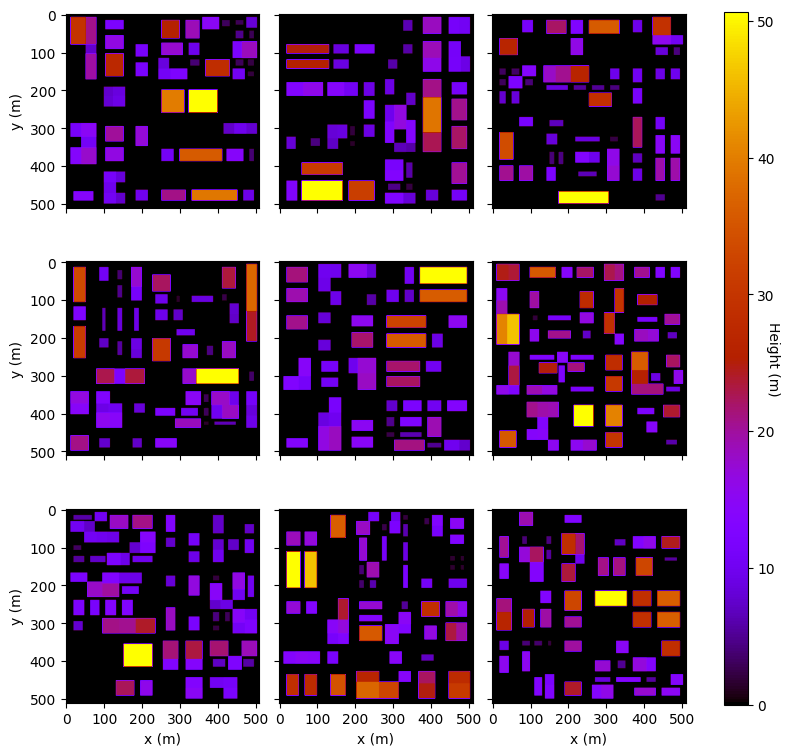

In [ ]:
# Plot a grid of city maps
N_ROWS = 3
N_COLS = 3
step = 25
spacing = 4

fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(N_ROWS, N_COLS, hspace=-0.1, wspace=0.1)
axs = gs.subplots(sharex=True, sharey=True)
for iii in range(N_COLS):
    for jjj in range(N_ROWS):
        building_grid = some_sample_building_maps[iii*N_ROWS + jjj]
        im = axs[iii, jjj].imshow(building_grid, cmap='gnuplot')
        axs[iii, jjj].set(xlabel='x (m)', ylabel='y (m)')
        axs[iii, jjj].set_xticks(np.arange(building_grid.shape[1], step = step))
        axs[iii, jjj].set_xticklabels(np.arange(building_grid.shape[1], step = step) * spacing)
        axs[iii, jjj].set_yticklabels(np.arange(building_grid.shape[0], step = step) * spacing)
        axs[iii, jjj].set_yticks(np.arange(building_grid.shape[0], step = step))
for iii in range(N_COLS):
    for jjj in range(N_ROWS):
        axs[iii, jjj].label_outer()
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink = 0.9, aspect=30)
cbar.ax.set_ylabel("Height (m)", rotation=-90)